In [ ]:
#Fire Vs No Fire
import os
from google.colab import drive

import numpy as np
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Flatten,Lambda

from io import BytesIO
from PIL import Image


data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(0.1),
        ]
    )

In [ ]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.BinaryAccuracy(name='bin_accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc')
]

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#For fire and no fire training files
#0.8 for training and 0.2 for validation 

In [ ]:
##This indicate it will be done for training files
dir_fire = '/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Training/Fire'
dir_no_fire = '/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Training/No_Fire'

In [ ]:
# 0 is Fire and 1 is NO_Fire
##This one is  faster than older one
#Traverse fire dataset 
fire = len([name for name in os.listdir(dir_fire) if os.path.isfile(os.path.join(dir_fire, name))])

In [ ]:
no_fire = len([name for name in os.listdir(dir_no_fire) if os.path.isfile(os.path.join(dir_no_fire, name))])

In [ ]:
print("Number of fire files in training:", fire)

Number of fire files in training: 25018


In [ ]:
print("Number of no fire files in training:", no_fire) 

Number of no fire files in training: 14357


In [ ]:
total = fire + no_fire
print("Total amount of training file:", total)

Total amount of training file: 39375


In [ ]:
weight_for_fire = (1 / fire) * total / 2.0
print("Weight for class fire : {:.2f}".format(weight_for_fire))

Weight for class fire : 0.79


In [ ]:
weight_for_no_fire = (1 / no_fire) * total / 2.0
print("Weight for class No_fire : {:.2f}".format(weight_for_no_fire))

Weight for class No_fire : 1.37


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Training", validation_split=0.2, subset="training", seed=1337, image_size=(200,200),batch_size=20, shuffle=True)

Found 14357 files belonging to 2 classes.
Using 11486 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Training", validation_split=0.2, subset="validation", seed=1337, image_size=(200,200),
        batch_size=20, shuffle=True)

Found 39375 files belonging to 2 classes.
Using 7875 files for validation.


In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)


In [ ]:
from keras import layers
from keras import models



model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)      

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(train_ds,steps_per_epoch=10,
                              epochs = 15,
                              validation_data=val_ds,
                              batch_size=32,verbose=1)

Epoch 1/15
10/10 [==============================] - 5898s 641s/step - loss: 38.8038 - acc: 0.5232 - val_loss: 0.6921 - val_acc: 0.8745
Epoch 2/15
10/10 [==============================] - 182s 20s/step - loss: 2.4152 - acc: 0.7560 - val_loss: 0.7730 - val_acc: 0.9013
Epoch 3/15
10/10 [==============================] - 178s 20s/step - loss: 0.6978 - acc: 0.8523 - val_loss: 3.9757 - val_acc: 0.7440
Epoch 4/15
10/10 [==============================] - 179s 20s/step - loss: 1.9567 - acc: 0.8178 - val_loss: 0.6468 - val_acc: 0.8597
Epoch 5/15
10/10 [==============================] - 176s 19s/step - loss: 0.4281 - acc: 0.9117 - val_loss: 0.4418 - val_acc: 0.8340
Epoch 6/15
10/10 [==============================] - 177s 20s/step - loss: 0.7008 - acc: 0.8267 - val_loss: 0.1610 - val_acc: 0.9577
Epoch 7/15
10/10 [==============================] - 178s 20s/step - loss: 0.6120 - acc: 0.8857 - val_loss: 0.1613 - val_acc: 0.9477
Epoch 8/15
10/10 [==============================] - 181s 20s/step - loss:

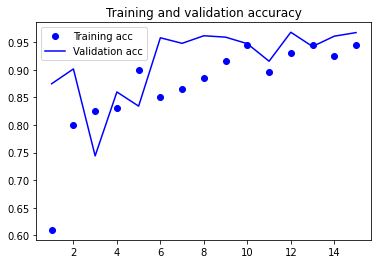

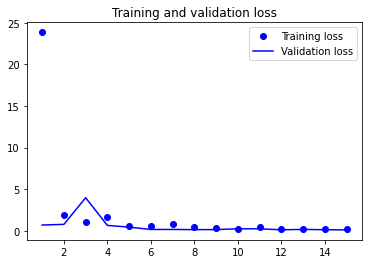

In [ ]:
model.save('fireModel_Old.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_fire_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Test", seed=1337, image_size=(200,200), batch_size=32, shuffle=True)

Found 8618 files belonging to 2 classes.


In [ ]:
loss, accuracy = model.evaluate(test_fire_ds)
print("Accuracy", accuracy)

270/270 [==============================] - 6638s 24s/step - loss: 1.1095 - acc: 0.5965
Accuracy 0.5965421199798584
